E-Commerce Customer and Sales Analysis Project

Step 1: Data Loading & Preprocessing 

•	Load the CSV into a Pandas DataFrame.

•	Check for missing values and handle appropriately.

•	Remove duplicate rows.

•	Convert InvoiceDate to datetime.

•	Filter only positive Quantity values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
df = pd.read_csv(r'C:\Users\sruth\Documents\Greenbootcamps\DS_Python_advanced\data\online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
#Check for missing values and handle appropriately.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [4]:

cols = df.columns.to_list()
cols = [i.lower().replace(' ', '_') for i in cols]
df.columns = cols
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df["description"] = np.where(df["description"].isna(), df["stockcode"], df["description"])

In [6]:
df['customer_id'] = pd.to_numeric(df['customer_id'], errors="coerce").fillna(-1).astype("Int64") #errors = "coerce" used to convert invalid datas to NaN

In [7]:
df.query('customer_id == -1').head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,-1,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,-1,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,-1,United Kingdom
470,489521,21646,21646,-50,2009-12-01 11:44:00,0.00,-1,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,-1,United Kingdom


In [8]:
df.isnull().sum()

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64

In [9]:
#Remove duplicate rows

# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Display rows that are duplicates
print(df[duplicates])

        invoice stockcode                        description  quantity  \
371      489517     21912           VINTAGE SNAKES & LADDERS         1   
383      489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
384      489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
385      489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   
386      489517     21821   GLITTER STAR GARLAND WITH BELLS          1   
...         ...       ...                                ...       ...   
1067136  581538     22068        BLACK PIRATE TREASURE CHEST         1   
1067150  581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
1067153  581538     22992             REVOLVER WOODEN RULER          1   
1067160  581538     22694                       WICKER STAR          1   
1067162  581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

                 invoicedate  price  customer_id         country  
371      2009-12-01 11:34:00   3.75        1

In [10]:
df = df.drop_duplicates()        # Remove duplicate rows and keep the first occurrence and updated df

In [11]:
df.duplicated().any()

np.False_

In [12]:
#Convert InvoiceDate to datetime
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
print(df.invoicedate.dtype)

datetime64[ns]


In [13]:
#Filter only positive Quantity values
(df['quantity'] < 0).any()
df.query('quantity < 0').head()  #quantity negative means cancellation!!


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [14]:
df = df[(df['quantity'] > 0) & (df['price'] > 0)]

In [15]:
(df['quantity'] < 0).any()
(df['price'] < 0).any()

np.False_

Step 2: Data Exploration & Summary

•	Display dataset info, head, and descriptive statistics.

•	Count total transactions and unique customers.

•	Identify top 5 products (Description) by total sales and quantity.

•	Identify top 5 countries by revenue.

In [16]:
df.info()  # 'Int' can include  null values(NaN) but 'int' doesn't include null values

<class 'pandas.core.frame.DataFrame'>
Index: 1007914 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   invoice      1007914 non-null  object        
 1   stockcode    1007914 non-null  object        
 2   description  1007914 non-null  object        
 3   quantity     1007914 non-null  int64         
 4   invoicedate  1007914 non-null  datetime64[ns]
 5   price        1007914 non-null  float64       
 6   customer_id  1007914 non-null  Int64         
 7   country      1007914 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 70.2+ MB


In [17]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [18]:
df.describe()   #1.234e+03 is equivalent to 1234:  1.234×10^3=1234  
df.describe(include='number')   #we can take explicitly or manually take numeric values by adding include parameter(to remove datetime..),bt by default pandas take only numeric columns in describe()

,quantity,price,customer_id
count,1.007914e+06,1.007914e+06,1007914.0
mean,1.111717e+01,4.074618e+00,11847.085627
std,1.284700e+02,5.043177e+01,6585.988087
min,1.000000e+00,1.000000e-03,-1.0
25%,1.000000e+00,1.250000e+00,12539.0
50%,4.000000e+00,2.100000e+00,14524.0
75%,1.200000e+01,4.130000e+00,16369.0
max,8.099500e+04,2.511109e+04,18287.0


In [19]:
#Count total transactions and unique customers.

print(f"Total Transactions count: {df.invoice.count()}")  #total number of rows
print(f"Total Transactions: {df.invoice.nunique()}")      #total transactions with unique invoice number
print(f"Customer count: {df.customer_id.nunique()}")      #count of customers,may have multiple invoices for each customer

Total Transactions count: 1007914
Total Transactions: 40078
Customer count: 5879


In [20]:
df.groupby('invoice')['customer_id'].count()  #for each invoice how many products the customer_id purchased

invoice
489434      8
489435      4
489436     19
489437     23
489438     17
           ..
581585     21
581586      4
581587     16
A563185     1
C496350     1
Name: customer_id, Length: 40078, dtype: Int64

In [21]:
#Identify top 5 products (Description) by total sales and quantity.

df['total_price'] = df.quantity * df.price
df.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [22]:
#Identify top 5 products (Description) by total sales.
top5_sales_total = df.groupby("description", as_index=False).agg({"total_price": "sum"}).sort_values('total_price', ascending=False).head()

top5_sales_total


,description,total_price
2916,Manual,339614.86
3830,REGENCY CAKESTAND 3 TIER,330590.32
1432,DOTCOM POSTAGE,309854.11
5162,WHITE HANGING HEART T-LIGHT HOLDER,260990.22
3187,"PAPER CRAFT , LITTLE BIRDIE",168469.60


In [23]:
#Identify top 5 products (Description) by total quantity.

top5_total_qantity = df.groupby('description',as_index=False).agg({"quantity":"sum"}).sort_values('quantity',ascending=False).head()
top5_total_qantity


,description,quantity
5283,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
5162,WHITE HANGING HEART T-LIGHT HOLDER,94658
3187,"PAPER CRAFT , LITTLE BIRDIE",80995
303,ASSORTED COLOUR BIRD ORNAMENT,80082
2749,MEDIUM CERAMIC TOP STORAGE JAR,78033


In [24]:
#Identify top 5 countries by revenue.

top5_total_qantity = df.groupby('country',as_index=False).agg({"total_price":"sum"}).sort_values('total_price',ascending=False).head()
top5_total_qantity

,country,total_price
40,United Kingdom,1.741057e+07
11,EIRE,6.587673e+05
26,Netherlands,5.540381e+05
15,Germany,4.250197e+05
14,France,3.504561e+05


Step 3: Feature Engineering & New Columns 

•	Create a TotalPrice column: Quantity * Price.

•	Extract Year, Month, Weekday from InvoiceDate.

•	Create IsHighValueCustomer column based on Monetary threshold.

•	Add a WeekendPurchase column indicating if the transaction occurred on Saturday or Sunday.


In [25]:
#Create a TotalPrice column: Quantity * Price.  -> please find the same from question -> step 2:3rd question

In [26]:
#Extract Year, Month, Weekday from InvoiceDate.

df['Month'] = df['invoicedate'].dt.month
df['Year'] = df['invoicedate'].dt.year
df['Day'] = df['invoicedate'].dt.day_name()
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Tuesday


In [27]:
#Create IsHighValueCustomer column based on Monetary threshold.

#grouping customer based on totalprice
customer_totalprice = df.groupby('customer_id')['total_price'].sum()

#setting a threshold from grouped totalprice data
threshold = customer_totalprice.quantile(0.90) 

print(f'quantile 90% = {round(threshold, 2)} pounds')

#we checked the customers having totalprice greater than threshold
high_valued_customers = customer_totalprice[customer_totalprice >  threshold] 

#create a column in df to show high valued customers
df['IsHighValueCustomer'] = df['customer_id'].isin(high_valued_customers.index)  #checking the customer_id in df present in high_valued_customers id,if there return as True
df.head()

quantile 90% = 5469.56 pounds


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Tuesday,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Tuesday,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Tuesday,False


In [28]:
df.query('IsHighValueCustomer == True')

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078,United Kingdom,59.50,12,2009,Tuesday,True
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078,United Kingdom,98.10,12,2009,Tuesday,True
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078,United Kingdom,17.85,12,2009,Tuesday,True
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078,United Kingdom,27.04,12,2009,Tuesday,True
16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,2009-12-01 09:06:00,6.95,13078,United Kingdom,20.85,12,2009,Tuesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067329,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777,United Kingdom,88.80,12,2011,Friday,True
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,12,2011,Friday,True
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00,12,2011,Friday,True
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80,12,2011,Friday,True


In [29]:
#Add a WeekendPurchase column indicating if the transaction occurred on Saturday or Sunday.
# df.query("Day == 'Saturday' or Day == 'Sunday'")
      #Or we can write in this way too...
# df['WeekendPurchase'] = (df['Day'] == 'Saturday') | (df['Day'] == 'Sunday')
# df.head()

# #fatima solution -> used because in most of the cases we have only one date column and dont have any day column
df['WeekendPurchase'] = df['invoicedate'].dt.weekday >= 5  #saturday = 5 sunday = 6, here monday is 0 bt in isoweekday() monday is 1
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer,WeekendPurchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Tuesday,False,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Tuesday,False,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Tuesday,False,False


In [30]:
# df[(df['Day'] == 'Saturday') | (df['Day'] == 'Sunday')]
df[df['invoicedate'].dt.weekday >= 5].head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer,WeekendPurchase
12061,490363,84950,ASSORTED COLOUR T-LIGHT HOLDER,192,2009-12-05 10:11:00,0.72,13199,United Kingdom,138.24,12,2009,Saturday,True,True
12062,490364,48185,DOOR MAT FAIRY CAKE,4,2009-12-05 10:25:00,6.75,13487,United Kingdom,27.00,12,2009,Saturday,False,True
12063,490364,84836,ZINC METAL HEART DECORATION,12,2009-12-05 10:25:00,1.25,13487,United Kingdom,15.00,12,2009,Saturday,False,True
12064,490364,22415,WHITE TISSUE REAM,1,2009-12-05 10:25:00,7.95,13487,United Kingdom,7.95,12,2009,Saturday,False,True
12065,490364,48187,DOOR MAT NEW ENGLAND,4,2009-12-05 10:25:00,6.75,13487,United Kingdom,27.00,12,2009,Saturday,False,True


Step 4: Pivot Tables & Grouping

•	Pivot table: total revenue per Month.

•	Pivot table: average order value per Country.

•	Group by CustomerID to see total transactions, average transaction value, and frequency.

•	Group by Weekday to analyze busiest days for sales


In [31]:
#Pivot table: total revenue per Month

pd.pivot_table(df, values='total_price', index='Month',columns='Year',aggfunc='sum')


Year,2009,2010,2011
Month,,,
1,NaN,651155.112,689811.610
2,NaN,551878.296,522545.560
3,NaN,830915.261,716215.260
4,NaN,678875.252,536968.491
5,NaN,657705.500,769296.610
6,NaN,749537.310,760547.010
7,NaN,648810.270,718076.121
8,NaN,695251.910,757841.380
9,NaN,921696.991,1056435.192


In [32]:
#Pivot table: average order value per Country

pd.pivot_table(df, values='total_price', index='country',columns='Year',aggfunc='mean')

Year,2009,2010,2011
country,,,
Australia,19.364286,50.438240,119.555183
Austria,52.587895,23.670425,25.439692
Bahrain,NaN,23.938224,32.258824
Belgium,22.380000,23.251856,20.344230
Bermuda,NaN,36.857059,NaN
Brazil,NaN,4.326935,35.737500
Canada,NaN,15.800779,24.280662
Channel Islands,25.363590,30.124220,27.502753
Cyprus,18.640421,22.099976,22.870979


In [33]:
#Group by CustomerID to see total transactions, average transaction value, and frequency.

df.groupby('customer_id').agg({'invoice' : ['nunique','count'], 'total_price' : 'mean'})

invoice          total_price
            nunique   count         mean
customer_id                             
-1             3109  228489    13.575401
12346            12      34  2281.072353
12347             8     222    22.169054
12348             5      51    39.596078
12349             4     175    25.306800
...             ...     ...          ...
18283            22     938     2.841045
18284             1      28    16.488571
18285             1      12    35.583333
18286             2      67    19.349701
18287             7     155    26.987032

[5879 rows x 3 columns]

In [34]:
#Group by Weekday to analyze busiest days for sales
df.groupby(df['invoicedate'].dt.weekday).agg({'total_price' : 'sum'}).sort_values('total_price',ascending=False)

#OR

# df.groupby('Day')['total_price'].sum().sort_values(ascending=False)

,total_price
invoicedate,
3,4195212.762
1,4078149.962
0,3581967.746
2,3488444.333
4,3323908.883
6,1799147.282
5,9803.050


Step 5: Advanced Filtering & Queries

•	Filter transactions with TotalPrice above a specific threshold.

•	Filter customers who purchased more than 5 times in a month.

•	Extract top 5 transactions with highest revenue per Country.


In [35]:
#Filter transactions with TotalPrice above a specific threshold.
print("Total price mean value:",df.total_price.mean())
# df[df['TotalPrice'] > df['TotalPrice'].mean()].head()
df[df.total_price > df.total_price.mean()].head()


Total price mean value: 20.315854346700213


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer,WeekendPurchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Tuesday,False,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Tuesday,False,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Tuesday,False,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Tuesday,False,False


In [36]:
#Filter customers who purchased more than 5 times in a month

# filters the -1 customer id
df_valid = df[df["customer_id"] != -1].copy()

df_valid['YearMonth'] = df_valid['invoicedate'].dt.to_period('M')
purchases_per_month = df_valid.groupby(['customer_id', 'YearMonth'])['invoice'].nunique().reset_index()
purchases_per_month
 
heavy_buyers_month = purchases_per_month[purchases_per_month['invoice'] > 5]
heavy_buyers_month



,customer_id,YearMonth,invoice
470,12471,2009-12,7
478,12471,2010-09,6
480,12471,2010-11,6
491,12471,2011-11,6
574,12482,2010-04,14
...,...,...,...
24884,18102,2011-11,6
24987,18139,2011-11,6
25125,18172,2011-11,6
25380,18231,2010-03,6


In [37]:
#Extract top 5 transactions with highest revenue per Country.

#Method 1: Sum total price per invoice (i.e., transaction level)
# top5_transactions_per_country = (
#     df.groupby(['country', 'invoice'])['total_price'].sum().reset_index()
#       .sort_values(['country', 'total_price'], ascending=[True, False])
#       .groupby('country')
#       .head(5)
# )
# top5_transactions_per_country


#Method 2: Pick rows with highest total_price as-is (i.e., product line level)

#Here, every row is treated individually — no grouping or summing. You're looking at the top 5 product line sales by revenue.
# top5_transactions_per_country = df.groupby('country').apply(lambda x: x.nlargest(5, 'total_price'))
# top5_transactions_per_country

#for cleaning and reset_index(drop=True) prevents the old index from being added back as a column and prevent  columns of country also,because it also behaving as index and give new indexes
top5_transactions_per_country = df.groupby('country').apply(lambda x: x.nlargest(5, 'total_price')).reset_index(drop=True)
top5_transactions_per_country

C:\Users\sruth\AppData\Local\Temp\ipykernel_31672\454289954.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_transactions_per_country = df.groupby('country').apply(lambda x: x.nlargest(5, 'total_price')).reset_index(drop=True)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer,WeekendPurchase
0,576394,23084,RABBIT NIGHT LIGHT,960,2011-11-15 10:32:00,1.79,12415,Australia,1718.40,11,2011,Tuesday,True,False
1,563614,22940,FELTCRAFT CHRISTMAS FAIRY,336,2011-08-18 08:51:00,3.75,12415,Australia,1260.00,8,2011,Thursday,True,False
2,545475,21217,RED RETROSPOT ROUND CAKE TINS,120,2011-03-03 10:59:00,8.95,12415,Australia,1074.00,3,2011,Thursday,True,False
3,563614,23314,VINTAGE CHRISTMAS TABLECLOTH,100,2011-08-18 08:51:00,10.39,12415,Australia,1039.00,8,2011,Thursday,True,False
4,540267,22720,SET OF 3 CAKE TINS PANTRY DESIGN,240,2011-01-06 11:12:00,4.25,12415,Australia,1020.00,1,2011,Thursday,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,520018,20886,BOX OF 9 PEBBLE CANDLES,24,2010-08-23 11:58:00,1.95,18140,West Indies,46.80,8,2010,Monday,False,False
211,520018,22444,GROW YOUR OWN PLANT IN A CAN,24,2010-08-23 11:58:00,1.25,18140,West Indies,30.00,8,2010,Monday,False,False
212,520018,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,6,2010-08-23 11:58:00,4.25,18140,West Indies,25.50,8,2010,Monday,False,False
213,520018,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,6,2010-08-23 11:58:00,4.25,18140,West Indies,25.50,8,2010,Monday,False,False


Step 6: Visualization

•	Line plot: total revenue over time (monthly).

•	Bar plot: top 10 products (Description) by TotalPrice.

•	Boxplot of TotalPrice per transaction to detect outliers.

•	Histogram of customer frequency or revenue.

•	Scatterplot: Quantity vs TotalPrice to identify trends or anomalies.

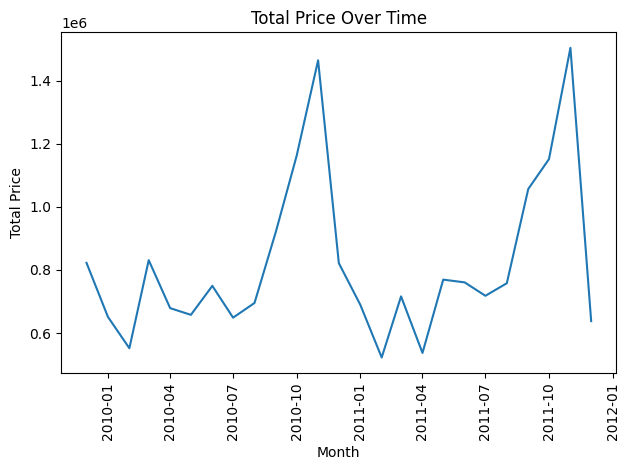

In [38]:

# Assuming 'invoicedate' is a datetime column and 'total_price' exists
df['YearMonth'] = df['invoicedate'].dt.to_period('M')

# Group by YearMonth and sum total_price
totalprice = df.groupby('YearMonth')['total_price'].sum().reset_index()

# Optional: Convert YearMonth back to datetime for plotting
totalprice['YearMonth'] = totalprice['YearMonth'].dt.to_timestamp()

# Plotting
sns.lineplot(data=totalprice, x='YearMonth', y='total_price')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price Over Time')
plt.xticks(rotation=90)
plt.tight_layout()



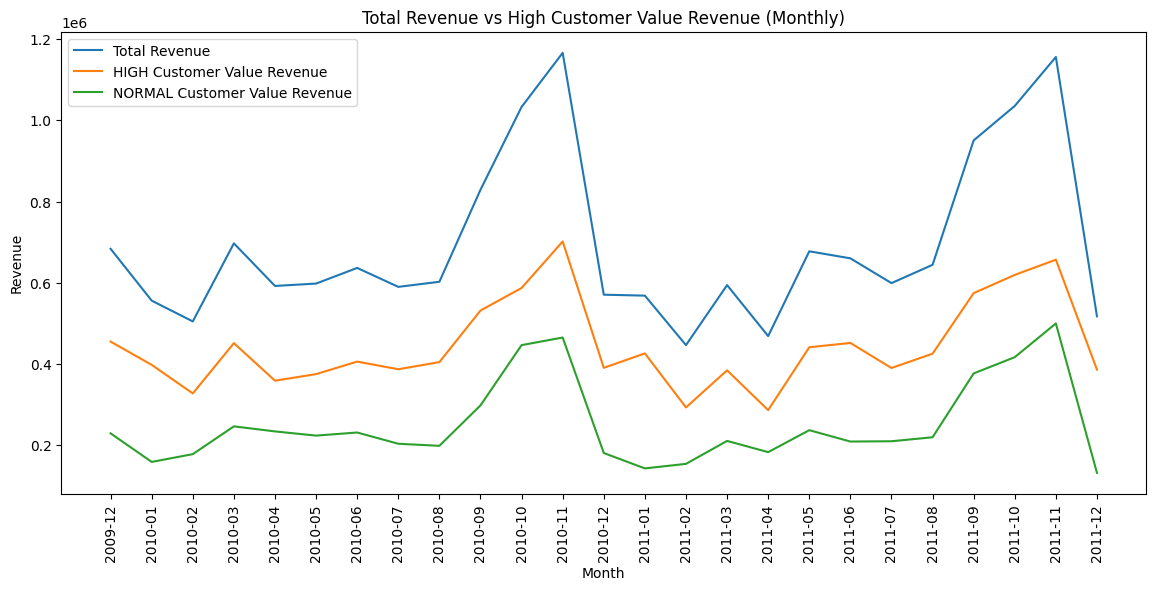

yearmonth
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517208.440
Freq: M, Name: total_price, dtype: float64
yearmonth
2009-12    454819.840
2010-01    397471.891
2010-02    327102.392
2010-03    451034.830
2010-04    358489.130
2010-05    374710.230
2010-06    405582.090
2010-07    386658.080
2010-08    404248.850
2010-09    531386.800
2010-10    586998.040
2010-11    701585.402
2010-12    390182.040
2011-01    425747.980
2011-02    292592.110
2011-03    384013.000
2011-04   

In [39]:
# FATIMA: GRAPHS with multiple lines:

# Create 'year_month' column
df_valid['yearmonth'] = df_valid['invoicedate'].dt.to_period('M')
 
# Total revenue per month
total_revenue_monthly = df_valid.groupby('yearmonth')['total_price'].sum()
 
# Revenue from high customer value (assuming you already have a boolean column 'high_value_customer')
high_value_revenue = df_valid[df_valid['IsHighValueCustomer']== True].groupby('yearmonth')['total_price'].sum()

normal_customer_revenue = df_valid[df_valid['IsHighValueCustomer']== False].groupby('yearmonth')['total_price'].sum()
 
# Plot both
plt.figure(figsize=(14,6))
plt.plot(total_revenue_monthly.index.astype(str), total_revenue_monthly.values, label='Total Revenue')
plt.plot(high_value_revenue.index.astype(str), high_value_revenue.values, label='HIGH Customer Value Revenue')
plt.plot(normal_customer_revenue.index.astype(str), normal_customer_revenue.values, label='NORMAL Customer Value Revenue')
 
plt.title('Total Revenue vs High Customer Value Revenue (Monthly)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.show()
 
print(total_revenue_monthly)
print(high_value_revenue)

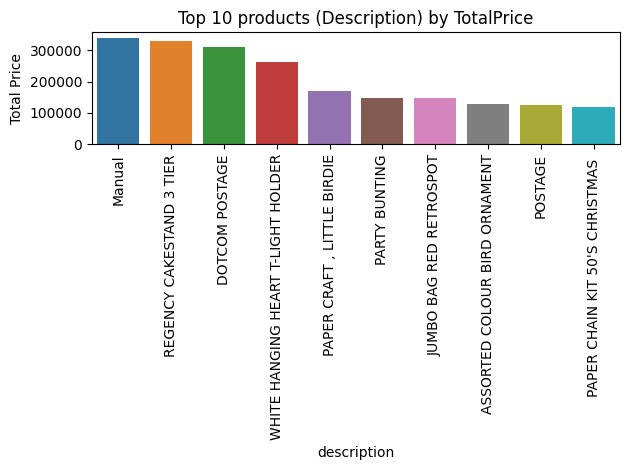

In [40]:
#Bar plot: top 10 products (Description) by TotalPrice

totalprice_prd = df.groupby('description')['total_price'].sum().sort_values(ascending=False).head(10).reset_index()
# top10_products = df.groupby('description')['total_price'].sum().nlargest(10)

# Plotting
plt.Figure(figsize=(8,8))
sns.barplot(data=totalprice_prd, x='description', y='total_price',hue='description')
plt.xlabel('description')
plt.ylabel('Total Price')
plt.title('Top 10 products (Description) by TotalPrice')
plt.xticks(rotation=90)
plt.tight_layout()


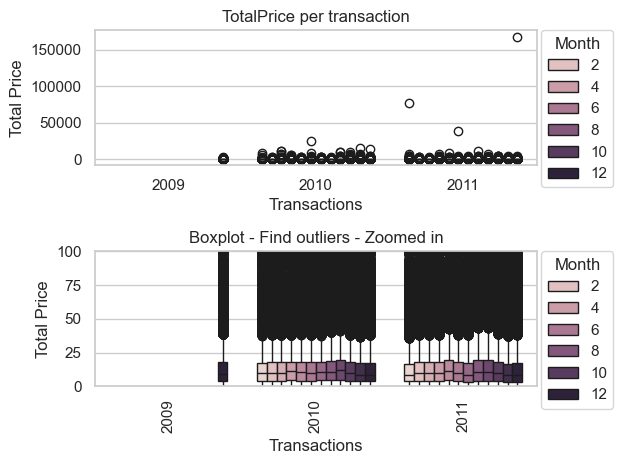

In [49]:
#Boxplot of TotalPrice per transaction to detect outliers.

# Plotting
plt.Figure(figsize=(14,10))


plt.subplot(2,1,1)
sns.boxplot(data=df, x='Year',y='total_price',hue='Month')
plt.xlabel('Transactions')
plt.ylabel('Total Price')
plt.title('TotalPrice per transaction')
# Move legend to the top left corner, outside the plot
plt.legend(title='Month', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)


plt.subplot(2,1,2)
sns.boxplot(data=df, x='Year',y='total_price',hue='Month')
plt.xlabel('Transactions')
plt.ylabel('Total Price')
plt.title('Boxplot - Find outliers - Zoomed in')
plt.ylim(0, 100)

# Move legend to the top left corner, outside the plot
plt.legend(title='Month', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)


plt.xticks(rotation=90)
plt.tight_layout()



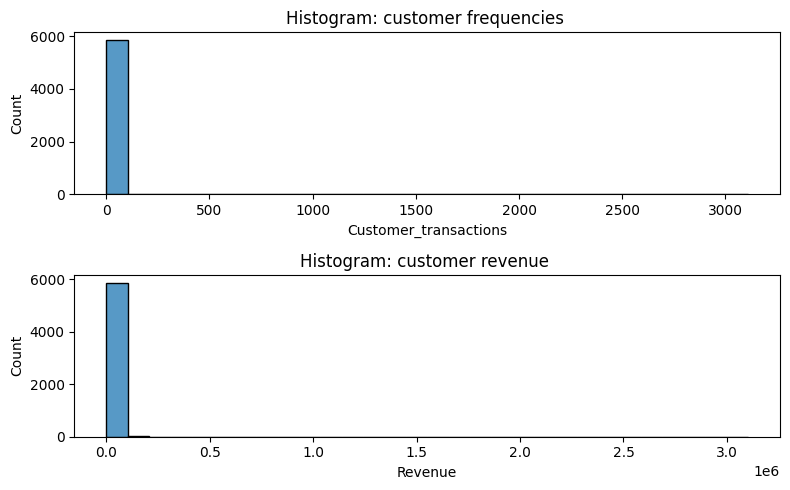

In [41]:
#Histogram of customer frequency or revenue.

# Plotting
plt.figure(figsize=(8, 5))
#customer frequency
customer_frequency = df.groupby('customer_id')['invoice'].nunique()
plt.subplot(2,1,1)
sns.histplot(customer_frequency, bins=30, kde=False)
plt.xlabel("Customer_transactions")
plt.title('Histogram: customer frequencies ')


#revenue vs customer
customer_revenue = df.groupby('customer_id')['total_price'].sum()
plt.subplot(2,1,2)
sns.histplot(customer_revenue, bins=30, kde=False)
plt.xlabel("Revenue")
plt.title('Histogram: customer revenue ')


plt.tight_layout()


# 1️⃣ Transactions per Customer (Top Plot):

# Most customers make very few transactions — this is why the huge spike is near zero.

# A small number of customers have many transactions (long tail to the right).

# This is a typical right-skewed distribution, common in retail: many casual customers and a few frequent buyers.

# The max transactions go up to about 3000, which are your very loyal/high-frequency customers.

# 2️⃣ Revenue per Customer (Bottom Plot):

# The distribution is also highly skewed, with most customers generating low revenue.

# A few customers generate very high revenue, reaching millions (3.1 million+).

# This indicates that a small number of customers contribute a large portion of your total revenue (Pareto principle / 80-20 rule).

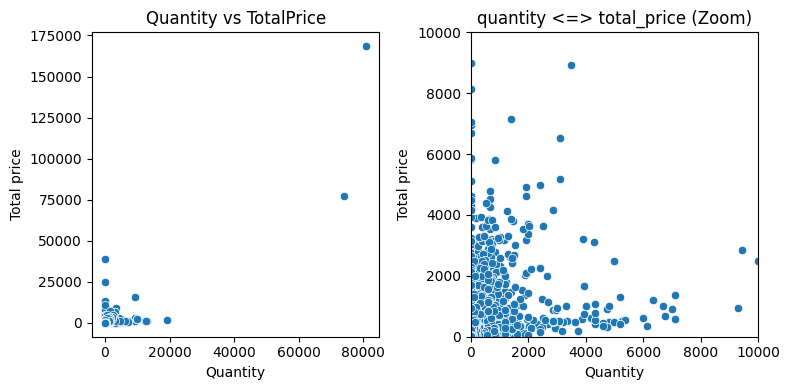

In [42]:
#Scatterplot: Quantity vs TotalPrice to identify trends or anomalies.

# Plotting
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.scatterplot(data = df,x='quantity',y='total_price')
plt.xlabel('Quantity')
plt.ylabel('Total price')
plt.title('Quantity vs TotalPrice')
plt.tight_layout()

# Zoomed in
plt.subplot(1,2,2)
sns.scatterplot(data = df, x='quantity', y='total_price')
plt.xlabel('Quantity')
plt.ylabel('Total price')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.title('quantity <=> total_price (Zoom)')

plt.tight_layout()

Insights & Presentation

In [43]:
#Identify top 5 customers by revenue and frequency.
#customer_frequency
df_valid.groupby('customer_id')['invoice'].nunique().nlargest(5).reset_index()

,customer_id,invoice
0,14911,398
1,12748,336
2,17841,211
3,15311,208
4,13089,203


In [44]:
#customer_revenue
df_valid.groupby('customer_id')['total_price'].sum().nlargest(5).reset_index()

,customer_id,total_price
0,18102,580987.04
1,14646,528602.52
2,14156,313437.62
3,14911,291420.81
4,17450,244784.25


In [45]:
# Determine peak and slow sales months.
High_sales = df_valid.groupby('Month')['total_price'].sum()
print(High_sales)
print(High_sales.idxmax())                            # idxmax returns the row label of the maximum value
print(High_sales.idxmin())                           # idxmin returns the row label of the minimum value


Month
1     1123903.982
2      950643.876
3     1291060.231
4     1060356.333
5     1275188.530
6     1296417.180
7     1188699.071
8     1246275.640
9     1779704.153
10    2068754.460
11    2322665.632
12    1771135.180
Name: total_price, dtype: float64
11
2


In [46]:
#Suggest actionable business strategies (promotions, customer focus, product focus).


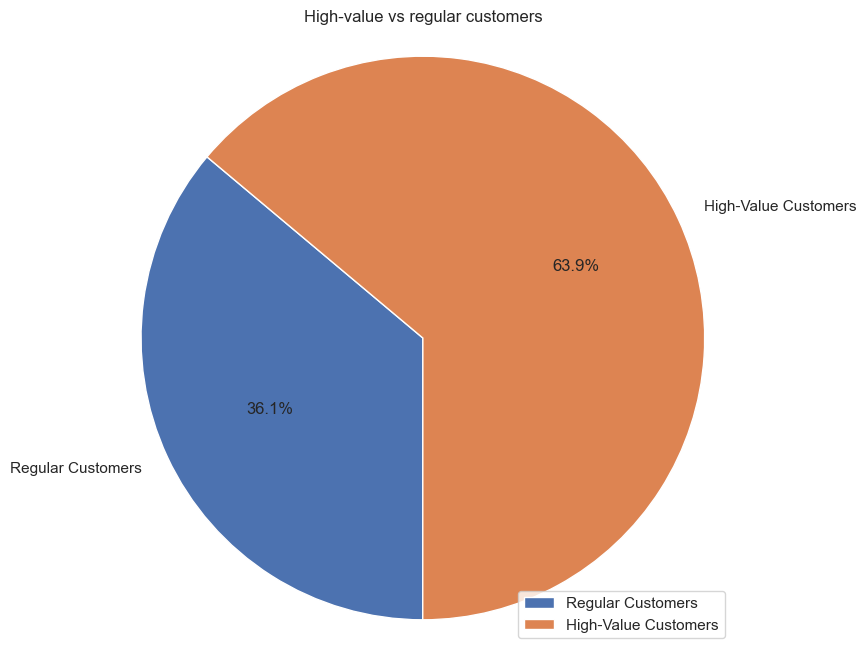

In [ ]:
# Compare high-value vs regular customers and their purchasing patterns.


sns.set_theme(style="whitegrid")


top_customers = df_valid.groupby('IsHighValueCustomer')['total_price'].sum()

# Custom labels
custom_labels = ['Regular Customers', 'High-Value Customers'] if False in top_customers.index else ['High-Value Customers']


# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_customers, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('High-value vs regular customers')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.legend()
plt.show()

In [48]:
#REPEATED CUSTOMERS
Unique_transactions = df_valid.groupby('customer_id')['invoice'].nunique()
repeated_customers_id = Unique_transactions[Unique_transactions > 100] .index
# Step 3: Filter original DataFrame for those customers
repeated_customers = df_valid[df_valid['customer_id'].isin(repeated_customers_id)]
repeated_customers


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,Month,Year,Day,IsHighValueCustomer,WeekendPurchase,YearMonth,yearmonth
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102,United Kingdom,27.44,12,2009,Tuesday,True,False,2009-12,2009-12
55,489438,21252,SET OF MEADOW FLOWER STICKERS,30,2009-12-01 09:24:00,1.69,18102,United Kingdom,50.70,12,2009,Tuesday,True,False,2009-12,2009-12
56,489438,21100,CHARLIE AND LOLA CHARLOTTE BAG,30,2009-12-01 09:24:00,1.15,18102,United Kingdom,34.50,12,2009,Tuesday,True,False,2009-12,2009-12
57,489438,21033,JUMBO BAG CHARLIE AND LOLA TOYS,30,2009-12-01 09:24:00,2.00,18102,United Kingdom,60.00,12,2009,Tuesday,True,False,2009-12,2009-12
58,489438,20711,JUMBO BAG TOYS,60,2009-12-01 09:24:00,1.30,18102,United Kingdom,78.00,12,2009,Tuesday,True,False,2009-12,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067319,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748,United Kingdom,6.75,12,2011,Friday,True,False,2011-12,2011-12
1067320,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748,United Kingdom,2.95,12,2011,Friday,True,False,2011-12,2011-12
1067321,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748,United Kingdom,1.45,12,2011,Friday,True,False,2011-12,2011-12
1067322,581580,79321,CHILLI LIGHTS,2,2011-12-09 12:20:00,5.75,12748,United Kingdom,11.50,12,2011,Friday,True,False,2011-12,2011-12
